task 2

Unemployment In India Analysis using Python

Laptop with Browser Icon
Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    int64  
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


In [5]:
df.shape

(740, 7)

In [4]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [7]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [8]:
#state with highest unemployement
df['Region'].value_counts().idxmax()

'Andhra Pradesh'

In [9]:
#state with lowest unemployment
df['Region'].value_counts().idxmin()

'Chandigarh'

In [10]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [23]:
import datetime as dt
import calendar
df[' Date']=pd.to_datetime(df[' Date'],dayfirst=True)
df['month_int']=df[' Date'].dt.month
df['month']=df['month_int'].apply(lambda x:calendar.month_abbr[x])

In [49]:
#month with highest unemployment
d=df[['month',' Estimated Unemployment Rate (%)']].groupby('month').sum().sort_values(' Estimated Unemployment Rate (%)',ascending=False)

In [50]:
d.head(12)

,Estimated Unemployment Rate (%)
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


Text(0, 0.5, 'Unemployment Rate (%)')

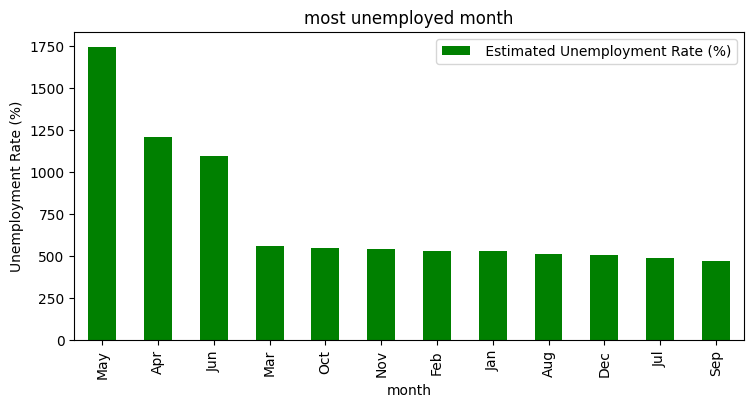

In [51]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
d[:12].plot(kind="bar",color="green",figsize=(19,4),ax=ax0)
ax0.set_title("most unemployed month")
ax0.set_xlabel('month')
ax0.set_ylabel('Unemployment Rate (%)')

In [15]:
df.drop(columns=[' Frequency','month_int'])

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762,44.68,Rural,Sep
...,...,...,...,...,...,...,...
735,West Bengal,2020-02-29,7.55,10871168,44.09,Urban,Feb
736,West Bengal,2020-03-31,6.67,10806105,43.34,Urban,Mar
737,West Bengal,2020-04-30,15.63,9299466,41.20,Urban,Apr
738,West Bengal,2020-05-31,15.22,9240903,40.67,Urban,May


Text(0, 0.5, 'no of people employed')

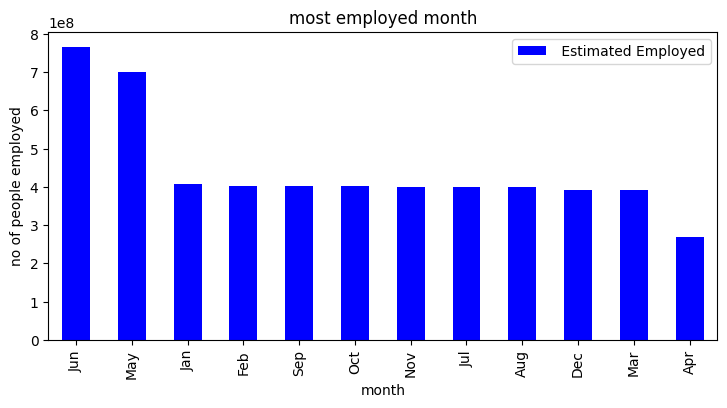

In [62]:
#month with highest employment
d1=df[['month',' Estimated Employed']].groupby('month').sum().sort_values(' Estimated Employed',ascending=False)
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
d1[:12].plot(kind="bar",color="blue",figsize=(19,4),ax=ax0)
ax0.set_title("most employed month")
ax0.set_xlabel('month')
ax0.set_ylabel('no of people employed')

In [65]:
#labor participation rate and unemployment rate in each month
d4=df.groupby(['month'])[[' Estimated Unemployment Rate (%)',' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean()
d4=pd.DataFrame(d4).reset_index()
month=d4.month
unemployment_rate=d4[' Estimated Unemployment Rate (%)']
labor_participation_rate=d4[' Estimated Labour Participation Rate (%)']

fig=go.Figure()

fig.add_trace(go.Bar(x=month,y=unemployment_rate,name='unemployment_rate'))
fig.add_trace(go.Bar(x=month,y=labor_participation_rate,name='labor_participation_rate'))

fig.update_layout(title='unemployment rate and labor participation rate',xaxis={'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})
fig.show()

In [68]:
#barplot unemployment rate(monthly)
fig=px.bar(df,x='Region',y=' Estimated Unemployment Rate (%)',animation_frame='month',color='Region',title='unemployment rate statewise')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=2000
fig.show()

In [54]:
# states with highest unemployment
d2=df[['Region',' Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(' Estimated Unemployment Rate (%)',ascending=False)

In [55]:
d2.head(10)

,Estimated Unemployment Rate (%)
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


Text(0, 0.5, 'Region')

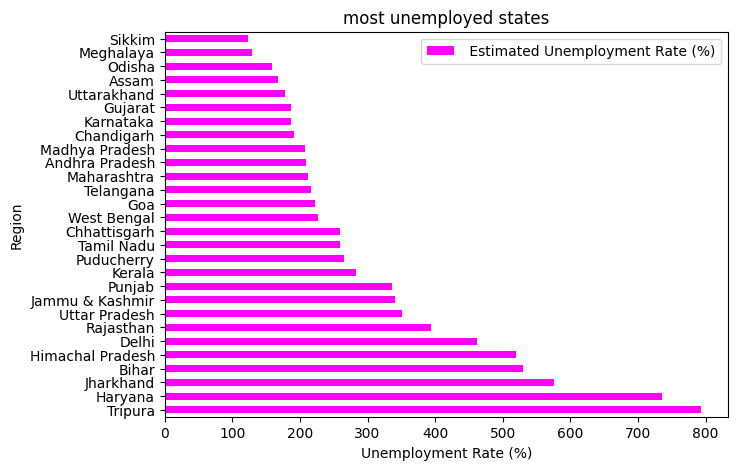

In [56]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
d2[:30].plot(kind="barh",color="magenta",figsize=(16,5),ax=ax0)
ax0.set_title("most unemployed states")
ax0.set_xlabel('Unemployment Rate (%)')
ax0.set_ylabel('Region')

In [58]:
d3=df[['Region',' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed',ascending=False)
d3.head()

,Estimated Employed
Region,
Uttar Pradesh,786655301
Maharashtra,559725484
West Bengal,481559064
Bihar,346253296
Tamil Nadu,343547309


Text(0, 0.5, 'Region')

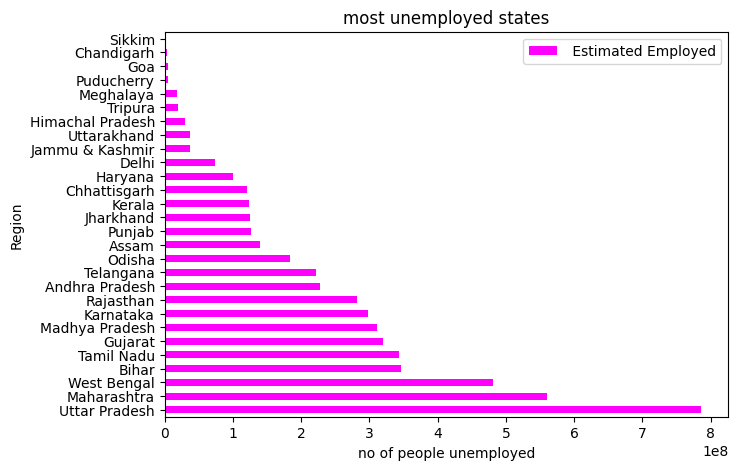

In [61]:
# states with highest unemployment
d3=df[['Region',' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed',ascending=False)
fig=plt.figure()
ax0=fig.add_subplot(1,2,2)
d3[:10].plot(kind="barh",color="magenta",figsize=(16,5),ax=ax0)
ax0.set_title("most unemployed states")
ax0.set_xlabel('no of people unemployed')
ax0.set_ylabel('Region')